## 1. Import Necessary Libraries

In [220]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## 2. Import the Data

In [178]:
bank_details= pd.read_csv('bank-full.csv', sep= ';')
bank_details

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 3. Data Understanding

In [179]:
bank_details.shape

(45211, 17)

In [180]:
bank_details.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [181]:
bank_details.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [182]:
bank_details.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Data Visualization

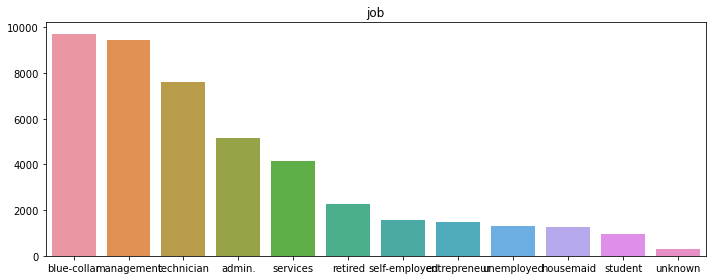

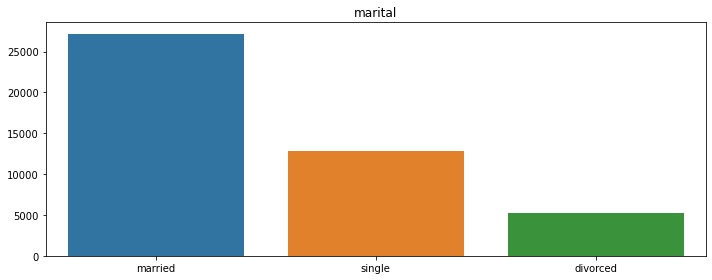

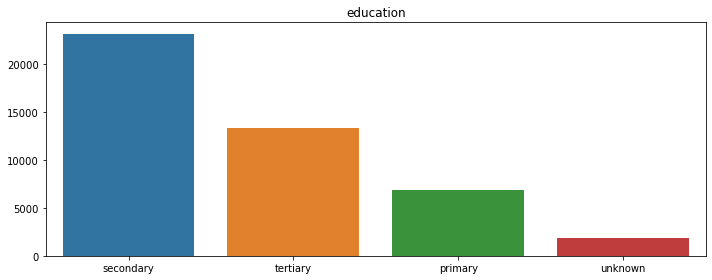

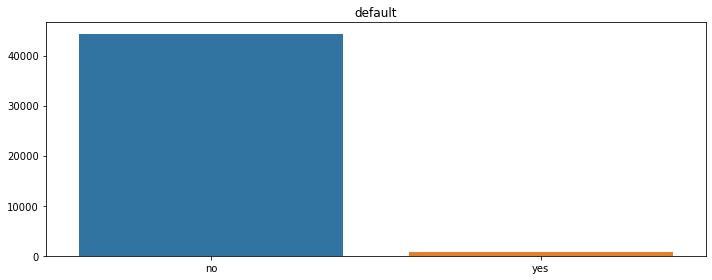

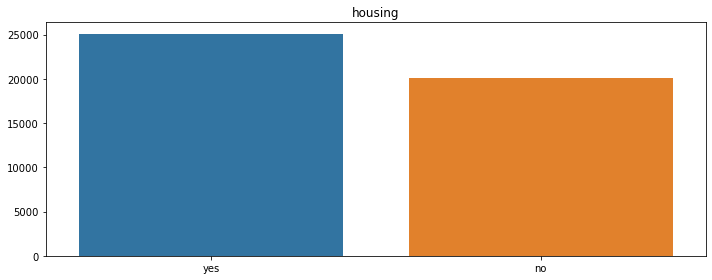

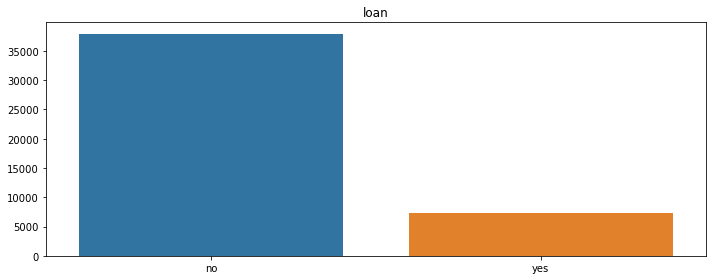

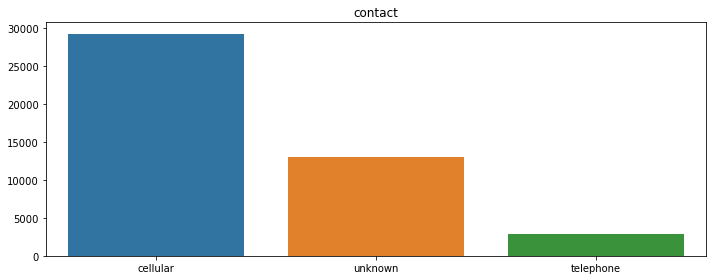

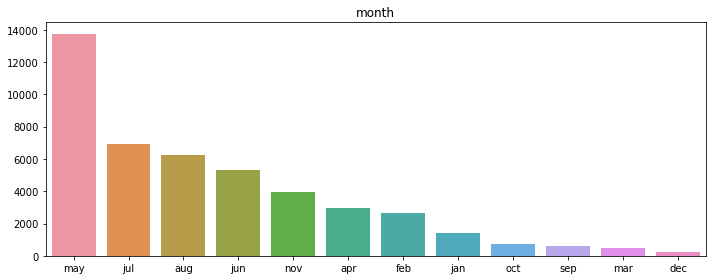

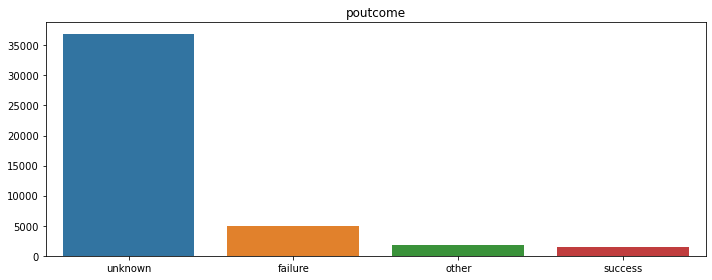

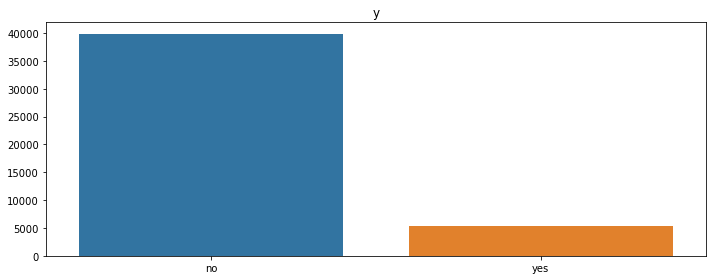

In [183]:
categorical_var= ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for colu in categorical_var:
    plt.figure(figsize=(10,4))
    sns.barplot(bank_details[colu].value_counts().index,bank_details[colu].value_counts().values)
    plt.title(colu)
    plt.tight_layout()

There are 45211 rows and 17 columns.

No missing values.

There are unknown values for many variables in the Data set.

Variables with unknown/missing values:'education', 'job', 'housing', 'loan', 'deafult', and 'marital

### Correlation Matrix of the numerical features

In [184]:
#converting the target variable into numeric variable.

In [186]:
bank_details.y= bank_details.y.map({'no': '0', 'yes':'1'}).astype('uint8')
bank_details

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [187]:
corr= bank_details.corr()
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


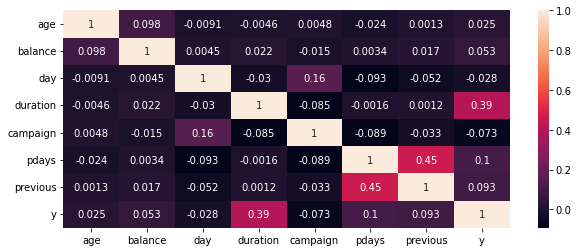

In [188]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True)
plt.show()

## There is no any variable highly correlated to y

## Data Processing

In [189]:
# drop the maarital and contact columns 
del bank_details['marital']
del bank_details['contact']

In [190]:
bank_details.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [191]:
#Changing the categorical Variables to Numerical Variable

In [193]:
bank_details[['default', 'housing', 'loan']]= bank_details[['default', 'housing', 'loan']].replace(['yes', 'no'], ['1','0'])
bank_details[['month']]= bank_details[['month']].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],['1','2','3','4','5','6','7','8','9','10','11','12'])
bank_details[['job']]= bank_details[['job']].replace(['unknown'],['other'])

bank_details.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [194]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_details['job']=le.fit_transform(bank_details['job'])
bank_details['education']=le.fit_transform(bank_details['education'])
bank_details['poutcome']=le.fit_transform(bank_details['poutcome'])

In [195]:
bank_details.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


## 4. Model Building

In [200]:
x= bank_details.drop('y', axis=1)
y= bank_details[['y']]

In [201]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=123)

In [202]:
x_train.shape,y_train.shape

((36168, 14), (36168, 1))

In [203]:
x_test.shape,y_test.shape

((9043, 14), (9043, 1))

## 5. Model Training

In [204]:
logestic_model= LogisticRegression()
logestic_model.fit(x_train,y_train)

LogisticRegression()

In [205]:
logestic_model.intercept_

array([-0.0734893])

In [206]:
logestic_model.coef_

array([[-2.84230264e-02,  3.94298078e-02, -1.07916008e-02,
        -5.18031315e-03,  3.92667517e-05, -1.94393792e-01,
        -5.01283709e-02, -2.22624708e-02, -1.04066945e-01,
         3.33378003e-03, -2.63858318e-01, -5.89788140e-04,
         1.11501400e-01, -1.94814317e-01]])

## 6. Model Testing || 7. Model Evaluation

#### Train Data

In [209]:
y_train_pred= logestic_model.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [210]:
confusion_matrix(y_train,y_train_pred)

array([[31358,   578],
       [ 3543,   689]], dtype=int64)

In [211]:
accuracy_score(y_train,y_train_pred)

0.886059500110595

In [212]:
precision_score(y_train,y_train_pred)

0.5438042620363063

In [213]:
recall_score(y_train,y_train_pred)

0.16280718336483932

In [215]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31936
           1       0.54      0.16      0.25      4232

    accuracy                           0.89     36168
   macro avg       0.72      0.57      0.59     36168
weighted avg       0.86      0.89      0.86     36168



0.7921032429935484


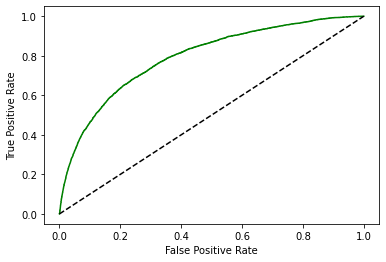

In [224]:
fpr, tpr, thresholds= roc_curve(y_train, logestic_model.predict_proba(x_train) [:,1])

auc= roc_auc_score(y_train, logestic_model.predict_proba(x_train) [:,1])
print(auc)

from matplotlib import pyplot as plt
plt.plot(fpr,tpr,color= 'green', label='logit model (area= %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Test Data

In [225]:
y_test_pred= logestic_model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [226]:
confusion_matrix(y_test,y_test_pred)

array([[7850,  136],
       [ 889,  168]], dtype=int64)

In [227]:
accuracy_score(y_test,y_test_pred)

0.8866526595156474

In [228]:
precision_score(y_test,y_test_pred)

0.5526315789473685

In [229]:
recall_score(y_test,y_test_pred)

0.15894039735099338

In [230]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7986
           1       0.55      0.16      0.25      1057

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



0.7795026111210229


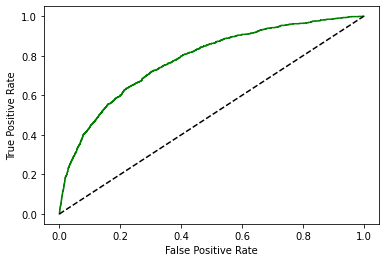

In [231]:
fpr, tpr, thresholds= roc_curve(y_test, logestic_model.predict_proba(x_test) [:,1])

auc= roc_auc_score(y_test, logestic_model.predict_proba(x_test) [:,1])
print(auc)

from matplotlib import pyplot as plt
plt.plot(fpr,tpr,color= 'green', label='logit model (area= %0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Accuracy of train data and test data are 0.89 which is good and  and ROC of 0.79 & 0.77 which also good hence the model performance is ok.

## 8. Model Deployment

In [232]:
from pickle import dump

In [234]:
dump(logestic_model, open('bankdetails.pkl', 'wb'))

In [235]:
from pickle import load

In [237]:
logestic_bank_model= load(open('bankdetails.pkl', 'rb'))

In [239]:
y_pred= logestic_bank_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## ===================================================================================================================